# Week_2 Assignment_2: Выбор метрики

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/gXjdV/vybor-mietriki

Данное задание основано на лекциях по метрическим методам и посвящено выбору наилучшей метрики для конкретной задачи.

#### Вы научитесь:
- выбирать оптимальную метрику из параметрического семейства

#### Введение
Главным параметром любого метрического алгоритма является функция расстояния (или метрика), используемая для измерения сходства между объектами. Можно использовать стандартный вариант (например, евклидову метрику), но гораздо более эффективным вариантом является подбор метрики под конкретную задачу. Один из подходов — использование той же евклидовой метрики, но с весами: каждой координате ставится в соответствие определенный коэффициент; чем он больше, тем выше вклад признака в итоговое расстояние. Веса настраиваются с целью оптимизации качества на отложенной выборке. Другой подход, о котором и пойдет речь в данном задании — выбор метрики из некоторого класса метрик. Мы возьмем за основу [метрику Минковского](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B8%D0%BD%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE):

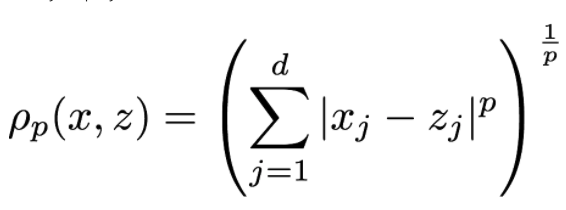

Параметром метрики Минковского является число p, которое мы и будем настраивать.

#### Реализация в sklearn
Нам понадобится решать задачу регрессии с помощью метода k ближайших соседей — воспользуйтесь для этого классом [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor). Метрика задается с помощью параметра metric, нас будет интересовать значение ’minkowski’. Параметр метрики Минковского задается с помощью параметра p данного класса.

#### Инструкция по выполнению
Мы будем использовать в данном задании набор данных Boston, где нужно предсказать стоимость жилья на основе различных характеристик расположения (загрязненность воздуха, близость к дорогам и т.д.). Подробнее о признаках можно почитать по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. Загрузите выборку Boston с помощью функции [sklearn.datasets.load_boston()](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20datasets#module-sklearn.datasets)Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей. Это значение параметра и будет ответом на задачу.. Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.
2. Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.
3. Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score; при использовании библиотеки scikit-learn версии 0.18.1 и выше необходимо указывать scoring='neg_mean_squared_error').  Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).
4. Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей. Это значение параметра и будет ответом на задачу.

## Ответы на вопросы задания

In [5]:
# load libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston

### 1. Загрузите выборку Boston

с помощью функции sklearn.datasets.load_boston(). Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.

In [32]:
X, y = load_boston(return_X_y=True)

"""
вариант:
boston = load.boston
X = boston.data
y = boston.target
"""

### 2. Приведите признаки в выборке к одному масштабу

In [33]:
from sklearn import preprocessing
X = preprocessing.scale(X)

### 3. Переберите разные варианты параметра метрики

метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию [numpy.linspace)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=numpy%20linspace#numpy.linspace). Используйте [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score); при использовании библиотеки scikit-learn версии 0.18.1 и выше необходимо указывать scoring='neg_mean_squared_error'). Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).

In [17]:
# загружаем и вызываем генератор разбиений для кросс-валидации
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsRegressor          # построение регрессии методом KNN
from sklearn.model_selection import cross_val_score        # метрика качества модели

In [43]:
param_array = np.linspace(1.0, 10.0, num=200, endpoint=True)       # создаем требуемый массив параметров метрики Минковского 

In [46]:
score = pd.DataFrame()                                                                      # создаем пустой склад метрик
for p in param_array: 
    knnR = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p, metric='minkowski')  # переопределяем модель
    score_p=np.mean(cross_val_score(knnR, X, y, scoring='neg_mean_squared_error', cv=kf))   # пересчитываем и усредняем метрику
    score = score.append({'param':p, 'score':score_p}, ignore_index=True)                   # добавляем в склад метрик
score

,param,score
0,1.000000,-16.030647
1,1.045226,-16.407839
2,1.090452,-16.370697
3,1.135678,-16.445716
4,1.180905,-16.475058
...,...,...
195,9.819095,-21.081264
196,9.864322,-21.082127
197,9.909548,-21.082979
198,9.954774,-21.083819


### 4. Определите, при каком p качество на кросс-валидации оказалось оптимальным

Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей. Это значение параметра и будет ответом на задачу.

**Ответ: 1.0**

In [45]:
score.sort_values(by=['score'], ascending=False).head(5)

,param,score
0,1.000000,-16.030647
2,1.090452,-16.370697
1,1.045226,-16.407839
3,1.135678,-16.445716
4,1.180905,-16.475058


ответ: Минимальное (по модулю) значение score достигается при р = 1.0, то есть в квадратном пространстве Минковского.